# Análisis de Ventas

## 1) Introducción y objetivo

### Contexto
Este proyecto analiza datos históricos de ventas para generar insights que apoyen
la toma de decisiones en un entorno de retail.

### Objetivo del proyecto
- Analizar el comportamiento de ventas por producto y categoría
- Identificar trimestres con más ventas del 2023
- Generar un dataset limpio para visualización en Power BI

## 2) Carga de datos

Se cargan los datasets de ventas e inventario desde la carpeta `data/raw`.

In [2]:
import pandas as pd
import numpy as np

# Cargar dataset
ventas = pd.read_csv("../data/raw/retail_sales_dataset.csv", index_col="Transaction ID")

# Vista rápida
ventas.head()


,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 3) Limpieza de datos

### Revisión inicial

Antes del análisis, se revisa la calidad de los datos:
- Valores nulos
- Tipos de datos incorrectos
- Duplicados

In [3]:
# Generar información de cada etiqueta del dataset
ventas.info()
# Verificar si hay datos nulos
ventas.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Customer ID       1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 70.3+ KB


Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Acciones de limpieza realizadas
- Conversión de la columna fecha a formato datetime
- Eliminación de registros duplicados
- Eliminación de valores nulos críticos

In [4]:
# Convertir fecha
ventas['Date'] = pd.to_datetime(ventas['Date'], errors='coerce')

# Eliminar duplicados
ventas = ventas.drop_duplicates()

# Eliminar nulos críticos
ventas = ventas.dropna(subset=['Quantity', 'Price per Unit', 'Customer ID'])

# Eliminar datos del 2024, el año 2023 es el que se va a analizar
ventas = ventas[ventas['Date'].dt.year == 2023]

ventas.shape

(998, 8)

## 4) Análisis exploratorio (EDA)

Se analizan métricas clave para entender el comportamiento del negocio.

### Ventas por categoría

In [5]:
# Ventas por categoría
ventas_categoria = (
    ventas.groupby('Product Category')['Total Amount']
    .sum()
    .sort_values(ascending=False)
)

ventas_categoria

Product Category
Electronics    156875
Clothing       155580
Beauty         142015
Name: Total Amount, dtype: int64

### Ventas por género

In [6]:
# Ventas por género
ventas_gener = (
    ventas.groupby('Gender')['Total Amount']
    .sum()
    .sort_values(ascending=False)
)

ventas_gener

Gender
Female    232840
Male      221630
Name: Total Amount, dtype: int64

### Ventas por trimestre

In [7]:
# Ventas por trimestre del 2023
ventas['trimestre'] = ventas['Date'].dt.to_period('Q')

ventas_trimestre = (
    ventas.groupby('trimestre')['Total Amount']
    .sum()
    .sort_values(ascending=False)
)

ventas_trimestre

trimestre
2023Q4    126190
2023Q2    123735
2023Q1    108500
2023Q3     96045
Freq: Q-DEC, Name: Total Amount, dtype: int64

## 5) Gráficos interpretados

### Ventas por categoría

Este gráfico permite identificar qué categorías concentran la mayor parte de las ventas,
lo cual ayuda a priorizar estrategias comerciales.

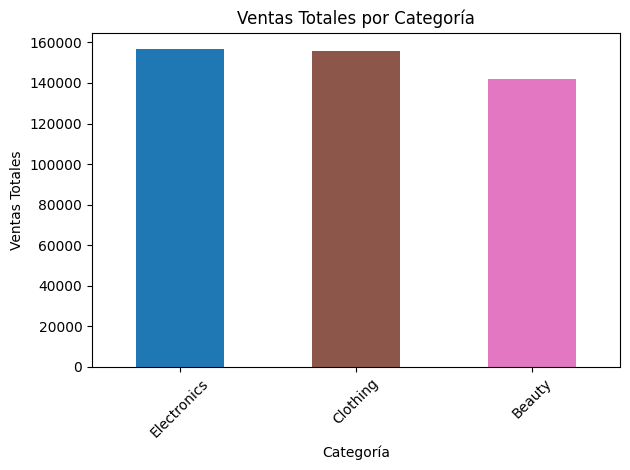

In [8]:
import matplotlib.pyplot as plt

bar_colors = ['tab:blue', 'tab:brown', 'tab:pink']
ventas_categoria.plot(kind='bar', color=bar_colors)
plt.title('Ventas Totales por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ventas por género

Este gráfico permite identificar cuál género concentra la mayor parte de las ventas,
lo cual ayuda a priorizar estrategias comerciales.

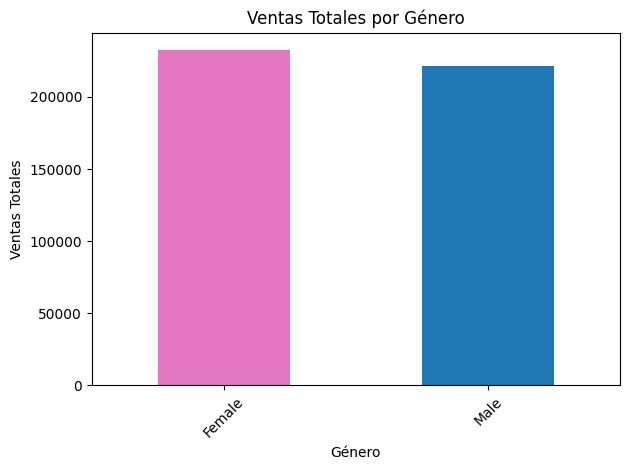

In [9]:
bar_colors = ['tab:pink', 'tab:blue']
ventas_gener.plot(kind='bar', color=bar_colors)
plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Ventas por trimestre

Este gráfico permite identificar en qué trimestre concentran la mayor parte de las ventas,
lo cual ayuda a priorizar estrategias comerciales y de inventario.

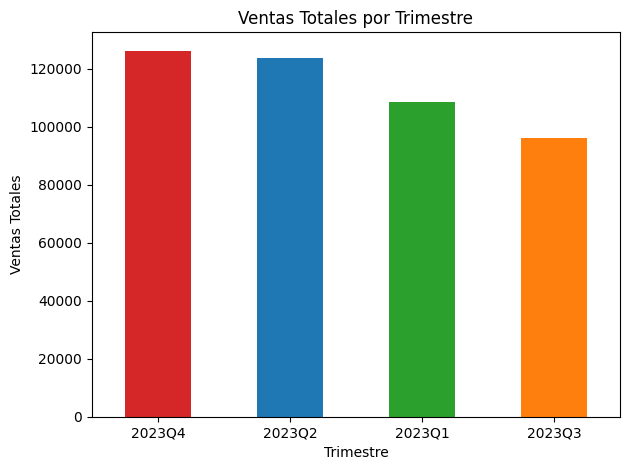

In [10]:
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
ventas_trimestre.plot(kind='bar', color=bar_colors)
plt.title('Ventas Totales por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 6) Conclusiones de negocio

A partir del análisis de ventas se identificaron los siguientes insights clave:

### Ventas por categoría

- Insight

Electronics y Clothing tienen niveles de ventas muy similares y altos.

Beauty presenta ventas menores, aunque no despreciables.

- Conclusiones de negocio

Las categorías Electronics y Clothing son los principales motores de ingresos del negocio.

Existe una dependencia relevante de estas dos categorías para sostener las ventas totales.

Beauty representa una categoría secundaria con potencial de optimización.

- Recomendaciones

Priorizar inventario, campañas y visibilidad comercial en Electronics y Clothing.

Analizar si Beauty puede crecer mediante promociones cruzadas o ajustes de precios.

Evaluar el margen de cada categoría para decidir si conviene impulsar volumen o rentabilidad.

### Ventas por género

- Insight

El segmento Female genera mayores ventas totales que el segmento Male.

La diferencia es clara, aunque ambos segmentos tienen un peso importante.

- Conclusiones de negocio

El comportamiento de compra no es homogéneo entre géneros.

El segmento femenino representa el principal contribuyente a las ventas.

Existe una oportunidad para incrementar ventas en el segmento masculino.

- Recomendaciones

Diseñar campañas de marketing más personalizadas para el segmento femenino.

Analizar el mix de productos ofrecido al segmento masculino para detectar oportunidades.

Evaluar si la diferencia se debe a frecuencia de compra, ticket promedio o variedad de productos.

### Ventas por trimestre

- Insight

Q4 es el trimestre con mayores ventas, seguido muy de cerca por Q2.

Q3 es el trimestre con menor desempeño.

Se observa una clara estacionalidad a lo largo del año.

- Conclusiones de negocio

El negocio presenta picos de ventas bien definidos en ciertos periodos del año.

La estacionalidad impacta directamente en los ingresos trimestrales.

Q3 representa un periodo crítico que afecta el desempeño anual.

- Recomendaciones

Planificar inventarios y campañas comerciales con foco en Q2 y Q4.

Implementar estrategias promocionales específicas para fortalecer Q3.

Usar esta información para mejorar la planificación financiera y operativa anual.

## 7) Exportación de datos

El dataset final se exporta para su uso en Power BI.

In [12]:
# Dataset final para Power BI
df_final = ventas.copy()

df_final.to_csv('../data/processed/ventas_limpio.csv', index=False)

print("Dataset limpio exportado correctamente.")


Dataset limpio exportado correctamente.
